In [48]:
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    
# 1. Importing all  essential libraries .
    import numpy as np
    from tqdm import tqdm
    from sklearn.metrics import accuracy_score
    
    train_score = []
    test_score = []
    
# 2. Creating subparts e.g D--> D1,D2,D3.... etc.

    each_part_len = int(len(x_train)/folds)
    lst = []                                  # Storing indices of randomly splitted datasets- D1,D2...
    lst_x = []                                # Storing x(independant varibles) of randomly splitted datasets- D1,D2...
    lst_y = []                                # Storing y(dependant varibles) of randomly splitted datasets- D1,D2...
    total_remaining = range(0,len(x_train))
    
    for a in  range(folds):

        indices = random.sample(total_remaining, each_part_len)
        lst.append(indices)
    
        lst_x.append(x_train[indices])
        lst_y.append(y_train[indices])
    
        total_remaining = set(total_remaining) - set(indices)
        total_remaining = list(total_remaining)
    
# 3. Taking each part as test dataset and training model using other(remaining parts) datasets.
# e.g D1 - testset | D2,D3 - training set

    for k in tqdm(param):
        train_scorefold = []
        test_scorefold = []
        
        set_no = list(range(folds))
        for i in set_no:
            set_no = list(range(folds))
            set_no.remove(i)
    
            train_x = np.array([]).reshape(0,2)
            train_y = np.array([])
            for j in  set_no:
                train_x = np.vstack((train_x, lst_x[j]))
                train_y = np.concatenate((train_y, lst_y[j]))
        
            test_x = lst_x[i]
            test_y = lst_y[i]
    
# 4. Training a model using joined datasets from subparts.
    
            classifier.n_neighbors = k
            classifier.fit(train_x, train_y)
    
# 5. predicting training dataset and test dataset.
            y_pred_train = classifier.predict(train_x)
            y_pred_test = classifier.predict(test_x)
    
# 6. Computing accuracy score for - 1.training set, 2. test set
            train_acc = accuracy_score(train_y, y_pred_train)
            test_acc = accuracy_score(test_y, y_pred_test)
            train_scorefold.append(train_acc)
            test_scorefold.append(test_acc)
        
# 7. taking mean for each hyper-parameter(k) value
        train_score.append(np.mean(np.array(train_scorefold)))
        test_score.append(np.mean(np.array(test_scorefold)))
    
    return train_score, test_score

**Define your parameters here -**

In [49]:
# 1. creating random dataset using sklearn
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)

# 2. splitting data intto x_train, y_train, x_test, y_test using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,stratify=y,random_state=42)

# 3. defining classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

# 4. Creating (k=)parameter_range
import random
param_range = (1,50)
param = random.sample(range(param_range[0], param_range[1]), 10)
param = sorted(param)

# 5. Define no. folds
folds = 3

In [50]:
# 6. Calling function 
train_score, test_score = RandomSearchCV(X_train,Y_train,classifier, param_range, folds)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:24<00:00,  1.99s/it]


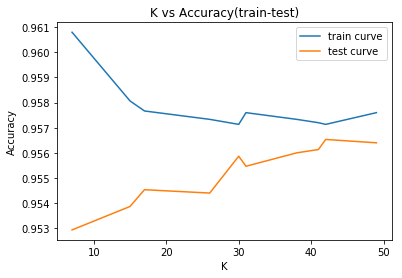

In [51]:
# 7. plotting Test-Train accuracy vs hyp-para(k) graph
import matplotlib.pyplot as plt
plt.plot(param, train_score, label = 'train curve')
plt.plot(param, test_score, label = 'test curve')
plt.title('K vs Accuracy(train-test)')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [52]:
# 8. picking up best test accuracy amongst provided params
import numpy as np
best_hyp_para = param[np.argmax(test_score)]

print('best hyper-parameter(k)=', best_hyp_para,'\nbest test_accuracy=', max(test_score))

best hyper-parameter(k)= 42 
best test_accuracy= 0.9565333333333333


In [53]:
# 9. plotting decision boundary

def plot_decision_boundary(X1, X2, y, clf):
    # Creating color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

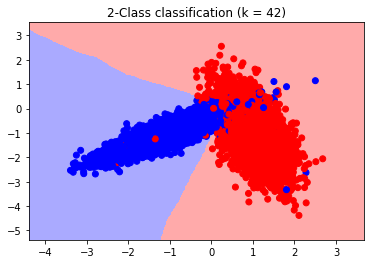

In [54]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = best_hyp_para)
neigh.fit(X_train, Y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], Y_train, neigh)